## Waste Management using CNN Model ##

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm
import cv2
import warnings
warnings.filterwarnings("ignore")

In [8]:
train_data="dataset\DATASET\DATASET\TRAIN"
test_data="dataset\DATASET\DATASET\TEST"


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [10]:
x_data=[]
y_data=[]
for category in glob(train_data+'/*'):
    for file in tqdm.tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({"image":x_data,"label":y_data})

100%|██████████| 9999/9999 [03:36<00:00, 46.09it/s]


In [11]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x203a306be00>,
 [Text(-0.546089972270482, -0.9548747259120561, 'Organic'),
  Text(0.5460898828686557, 0.9548747770406851, 'Recycle')],
 [Text(-0.297867257602081, -0.5208407595883943, '55.69%'),
  Text(0.2978672088374485, 0.5208407874767372, '44.31%')])

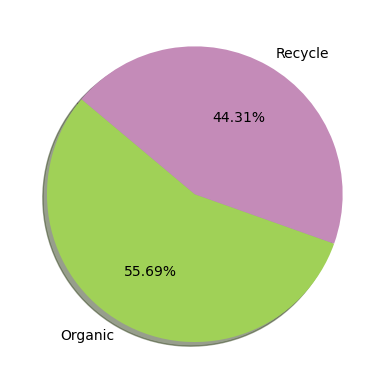

In [12]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts() ,labels=['Organic','Recycle'],autopct='%0.2f%%',colors=colors,shadow=True, startangle=140)